In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re
import plotly.express as px
from rndeda import edamissing
from rndeda import eda2d


In [2]:
df = pd.read_csv("../dataset/titanic/train.csv")


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
eda2d.descibe_2D_category_table(df, "Sex", "Survived")

,0,1,percentile_0,percentile_1
Sex,,,,
female,81,233,25.80 %,74.20 %
male,468,109,81.11 %,18.89 %


In [12]:
data = eda2d.descibe_2D_category_table(df, "Survived", "Sex")
data.index = data.index.map(str)
data.head()

,female,male,percentile_male,percentile_female
Survived,,,,
0,81,468,85.25 %,14.75 %
1,233,109,31.87 %,68.13 %


In [15]:
data.index.name

'Survived'

In [17]:
for column in data.columns:
    if "percentile" not in column:
        print(column)
        bar = go.Bar(
            name="Gender " + " " + row,
            x=data.index,
            y=data[column],
            texttemplate="%{y}",
            textposition="inside",
            textangle=0,
            textfont_color="white",
        )

female
male


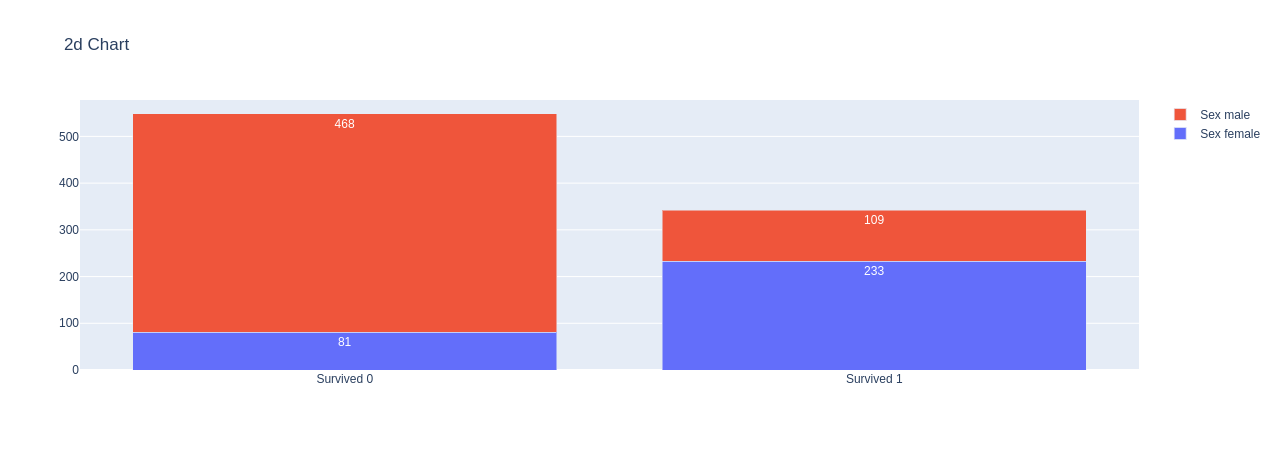

In [26]:
column1 = "Survived"
column2 = "Sex"
fig = go.Figure()
for column in data.columns:
    if "percentile" not in column:
        bar = go.Bar(
            name=column2 + " " + column,
            x=column1 + " " + data.index.map(str),
            y=data[column],
            texttemplate="%{y}",
            textposition="inside",
            textangle=0,
            textfont_color="white",
        )
        fig.add_trace(bar)
fig.update_layout(
    title_text="2d Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)
fig.show()

In [16]:
data.head()

,female,male,percentile_male,percentile_female
Survived,,,,
0,81,468,85.25 %,14.75 %
1,233,109,31.87 %,68.13 %


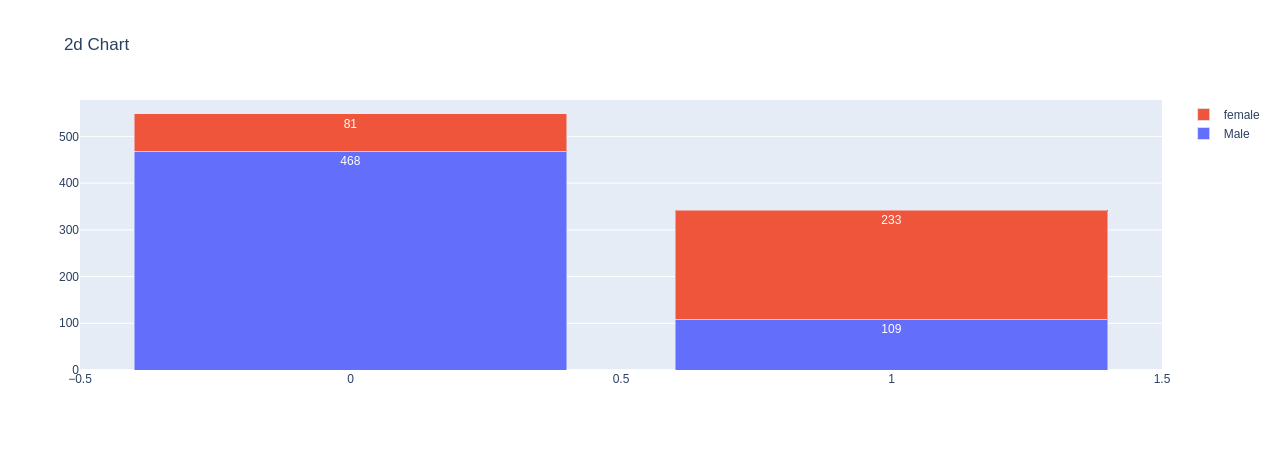

In [13]:
fig = go.Figure()
bar1 = go.Bar(
        name="Male",
        x=data.index,
        y=data["male"],
        texttemplate="%{y}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
    )
bar2 = go.Bar(
        name="female",
        x=data.index,
        y=data["female"],
        texttemplate="%{y}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
    )

fig.add_trace(bar1)
fig.add_trace(bar2)
fig.update_layout(
    title_text="2d Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)
fig.show()

In [35]:
def create_2d_category_chart(data, column1, column2):
#     column1 = "Survived"
#     column2 = "Sex"
    fig = go.Figure()
    for column in data.columns:
        if "percentile" not in column:
            bar = go.Bar(
                name=column2 + " " + column,
                x=column1 + " " + data.index.map(str),
                y=data[column],
                texttemplate="%{y}",
                textposition="inside",
                textangle=0,
                textfont_color="white",
            )
            fig.add_trace(bar)
    fig.update_layout(
        title_text="2d Chart",
        barmode="stack",
        uniformtext=dict(mode="hide", minsize=10),
    )
    return fig

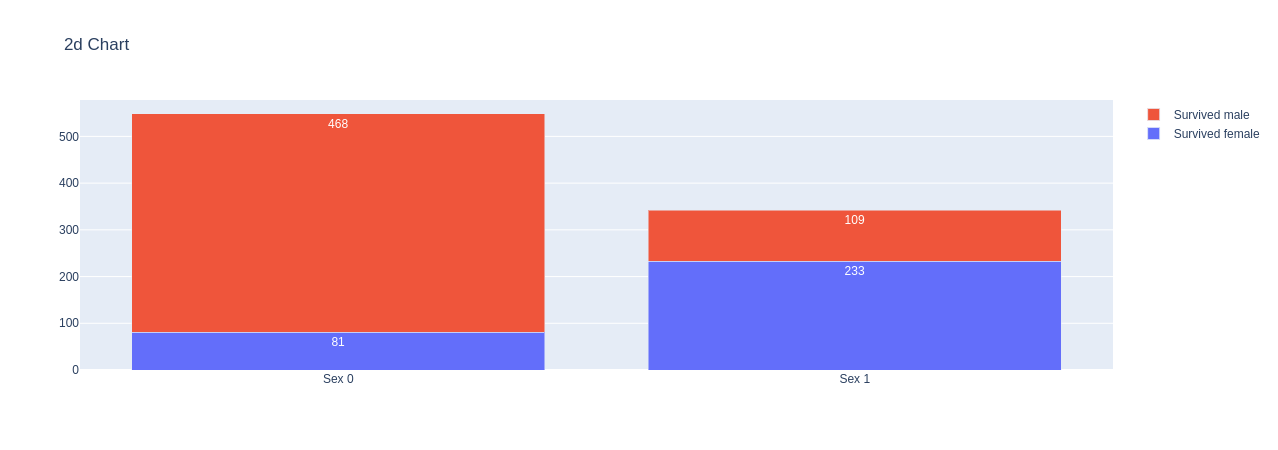

In [36]:
create_2d_category_chart(data, "Sex", "Survived")

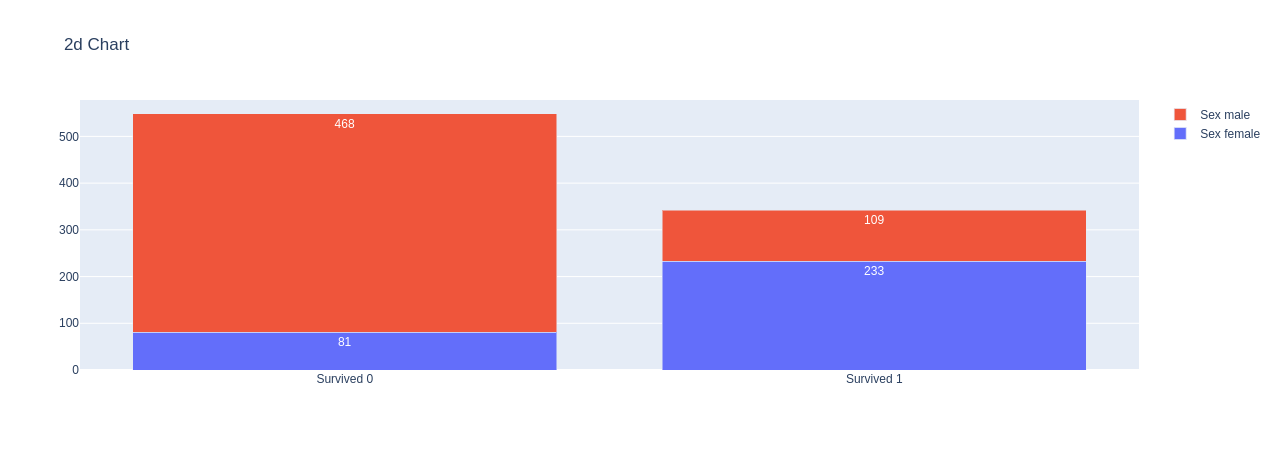

In [37]:
create_2d_category_chart(data, "Survived", "Sex")

In [77]:
def descibe_2D_category_table(df_input: pd.DataFrame, column1: str, column2: str):
    """
    :param df_input: dataframe
    :param column1: name of column (should be category)
    :param column2: name of column (should be category)
    :return: a dataframe
    """
    category_const = "category_"
    df_count = df_input.groupby([column1, column2])[column2].size().unstack(fill_value=0)
    df_count.columns = [category_const + str(column) for column in df_count.columns]
    values = df_input[column2].unique()
    values = [category_const + str(column) for column in values]
    # values_col_name = ["feature_" + str(feature) for feature in values ]
    # values = values_col_name
    df_percentile = pd.DataFrame()
    for value in values:
        df_percentile['percentile_' + str(value)] = df_count[value]/df_count.sum(axis=1)
        df_percentile['percentile_' + str(value)] = df_percentile['percentile_' + str(value)].apply(lambda x: "{0:.2f} %".format(x*100))
    return df_count.join(df_percentile)

In [78]:
descibe_2D_category_table(df, "Sex", "Survived")

,category_0,category_1,percentile_category_0,percentile_category_1
Sex,,,,
female,81,233,25.80 %,74.20 %
male,468,109,81.11 %,18.89 %


In [79]:
df_input = df
column1 = "Sex"
column2 = "Survived"
df_count = df_input.groupby([column1, column2])[column2].size().unstack(fill_value=0)
values = df_input[column2].unique()
values_col_name = ["feature_" + str(feature) for feature in values ]
values_col_name

['feature_0', 'feature_1']

In [61]:
df_count.columns = ["feature_" + str(column) for column in df_count.columns]


In [62]:
df_count.columns

Index(['feature_0', 'feature_1'], dtype='object')

In [53]:
df_count

Survived,0,1
Sex,,
female,81,233
male,468,109


In [71]:
df_count = df_input.groupby([column1, column2])[column2].size().unstack(fill_value=0)
df_count.columns = ["feature_" + str(column) for column in df_count.columns]
values = df_input[column2].unique()
values = ["feature_" + str(column) for column in values]
# values_col_name = ["feature_" + str(feature) for feature in values ]
# values = values_col_name
# df_percentile = pd.DataFrame()
# for value in values:
#     df_percentile['percentile_' + str(value)] = df_count[value]/df_count.sum(axis=1)
#     df_percentile['percentile_' + str(value)] = df_percentile['percentile_' + str(value)].apply(lambda x: "{0:.2f} %".format(x*100))

In [72]:
values

['feature_0', 'feature_1']

In [87]:
def descibe_2D_category_table(df_input: pd.DataFrame, column1: str, column2: str):
    """
    :param df_input: dataframe
    :param column1: name of column (should be category)
    :param column2: name of column (should be category)
    :return: a dataframe
    """
    category_const = "category_"
    df_count = df_input.groupby([column1, column2])[column2].size().unstack(fill_value=0)
    df_count.columns = [category_const + str(column) for column in df_count.columns]
    values = df_input[column2].unique()
    values = [category_const + str(column) for column in values]
    # values_col_name = ["feature_" + str(feature) for feature in values ]
    # values = values_col_name
    df_percentile = pd.DataFrame()
    for value in values:
        df_percentile['percentile_' + str(value)] = df_count[value]/df_count.sum(axis=1)
        df_percentile['percentile_' + str(value)] = df_percentile['percentile_' + str(value)].apply(lambda x: "{0:.2f} %".format(x*100))
    return df_count.join(df_percentile)


def create_2d_category_chart_from_table(data, column1, column2):
    """
    :param data: output from descibe_2D_category_table
    :param column1:
    :param column2:
    """
    fig = go.Figure()
    for column in data.columns:
        column = str(column)
        if "percentile" not in str(column):
            bar = go.Bar(
                name=column2 + " " + str(column).replace("category_", ""),
                x=column1 + " " + data.index.map(str),
                y=data[column],
                texttemplate="%{y}",
                textposition="inside",
                textangle=0,
                textfont_color="white",
            )
            fig.add_trace(bar)
    fig.update_layout(
        title_text="2d Chart",
        barmode="stack",
        uniformtext=dict(mode="hide", minsize=10),
    )
    return fig

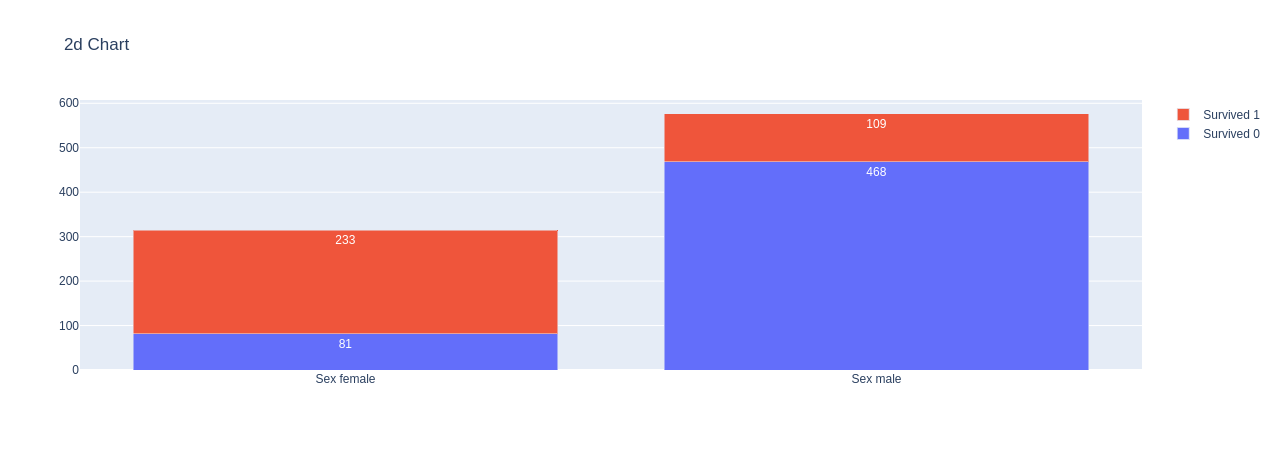

In [88]:
table = descibe_2D_category_table(df, "Sex", "Survived")
fig = create_2d_category_chart_from_table(table, "Sex", "Survived")
fig.show()

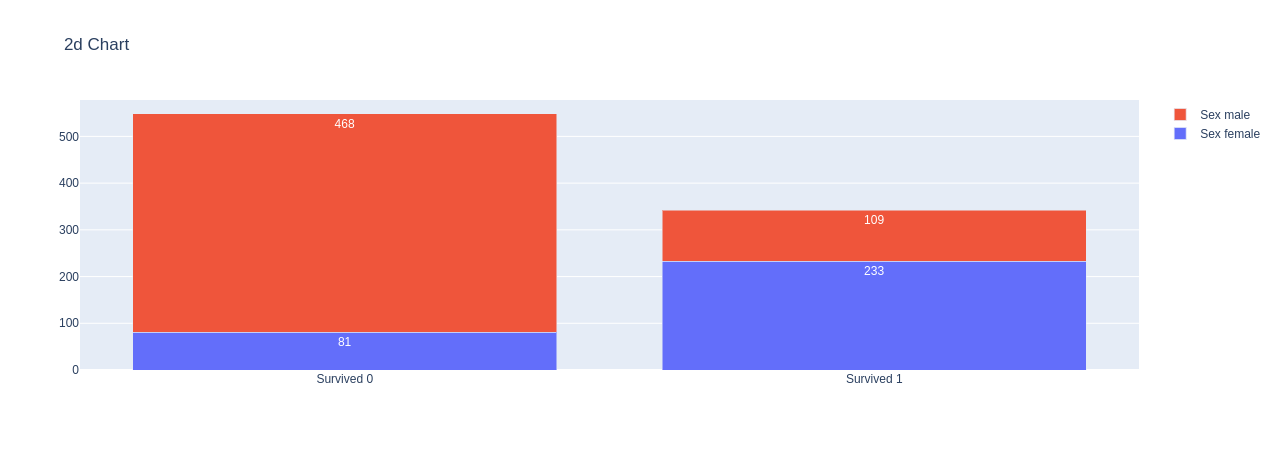

In [89]:
table = descibe_2D_category_table(df, "Survived", "Sex")
fig = create_2d_category_chart_from_table(table, "Survived", "Sex")
fig.show()